In [1]:
import tensorflow as tf
import keras
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv
import os
from PIL import Image

In [2]:
dir = './Testset/'
dir2 = './Brain Tumor/'

In [3]:
files = list(os.walk(dir))[0][2]
files2 = list(os.walk(dir2))[0][2][:10]

In [7]:
images = []

for img in files:

    images.append(np.array(cv.imread(dir+img)))

In [8]:
images2 = []

for img in files2:

    images2.append(np.array(cv.imread(dir2+img)))

In [15]:
y = np.array([cv.resize(img,(112,112)) for img in images])
X = y.copy()
y2 = np.array([cv.resize(img,(112,112)) for img in images2])
X2 = y2.copy()

In [16]:
y = np.array(y)/255
X = np.array(X)/255
y2 = np.array(y2)/255
X2 = np.array(X2)/255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


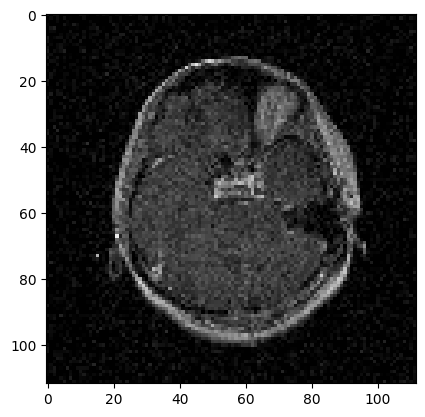

In [17]:
mean=0
sigma = 0.05
n = np.random.normal(loc=mean,scale=sigma,size=(112,112,1))
X = np.array([img+n for img in X])
X2 = np.array([img+n for img in X2])
plt.imshow(X[10])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


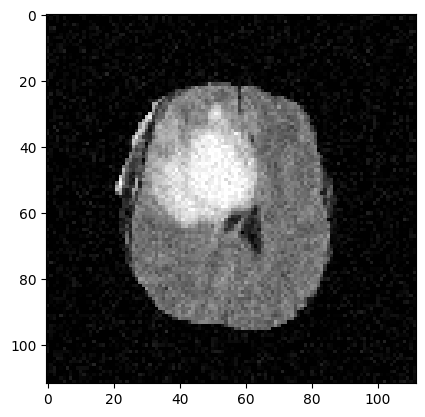

In [18]:
plt.imshow(X2[8])

In [19]:
def pixel_mse_loss(y_true,y_pred):
  return tf.reduce_mean( (y_true - y_pred) ** 2 )

def PSNR(y_true,y_pred):
  mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
  return 20 * log10(1 / (mse ** 0.5))

def log10(x):
  numerator = tf.math.log(x)
  denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
  return numerator / denominator

In [20]:
denoiser = keras.models.load_model('denoiser2.h5',custom_objects={'PSNR':PSNR})

In [21]:
denoiser_enhancer = keras.models.load_model('Denoiser_Enhancer2.h5',custom_objects={'PSNR':PSNR})

In [22]:
denoiser_enhancer.evaluate(X,y)

41/41 [==============================] - 7s 103ms/step - loss: 7.1732e-04 - PSNR: 31.5378


[0.0007173194899223745, 31.537803649902344]

In [23]:
denoiser_enhancer.evaluate(X2,y2)

1/1 [==============================] - 0s 379ms/step - loss: 2.4969e-04 - PSNR: 36.0260


[0.00024968822253867984, 36.02602005004883]

In [24]:
denoiser.evaluate(X,y)

41/41 [==============================] - 2s 36ms/step - loss: 0.0015 - PSNR: 28.5152


[0.0014787092804908752, 28.51515769958496]

In [25]:
denoiser.evaluate(X2,y2)

1/1 [==============================] - 0s 126ms/step - loss: 4.7080e-04 - PSNR: 33.2716


[0.00047080000513233244, 33.271636962890625]

In [26]:
denoiser_outputs = denoiser.predict(X)
denoise_enhance_outputs = denoiser_enhancer.predict(X)

denoiser_outputs2 = denoiser.predict(X2)
denoise_enhance_outputs2 = denoiser_enhancer.predict(X2)

1/1 [==============================] - 0s 18ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


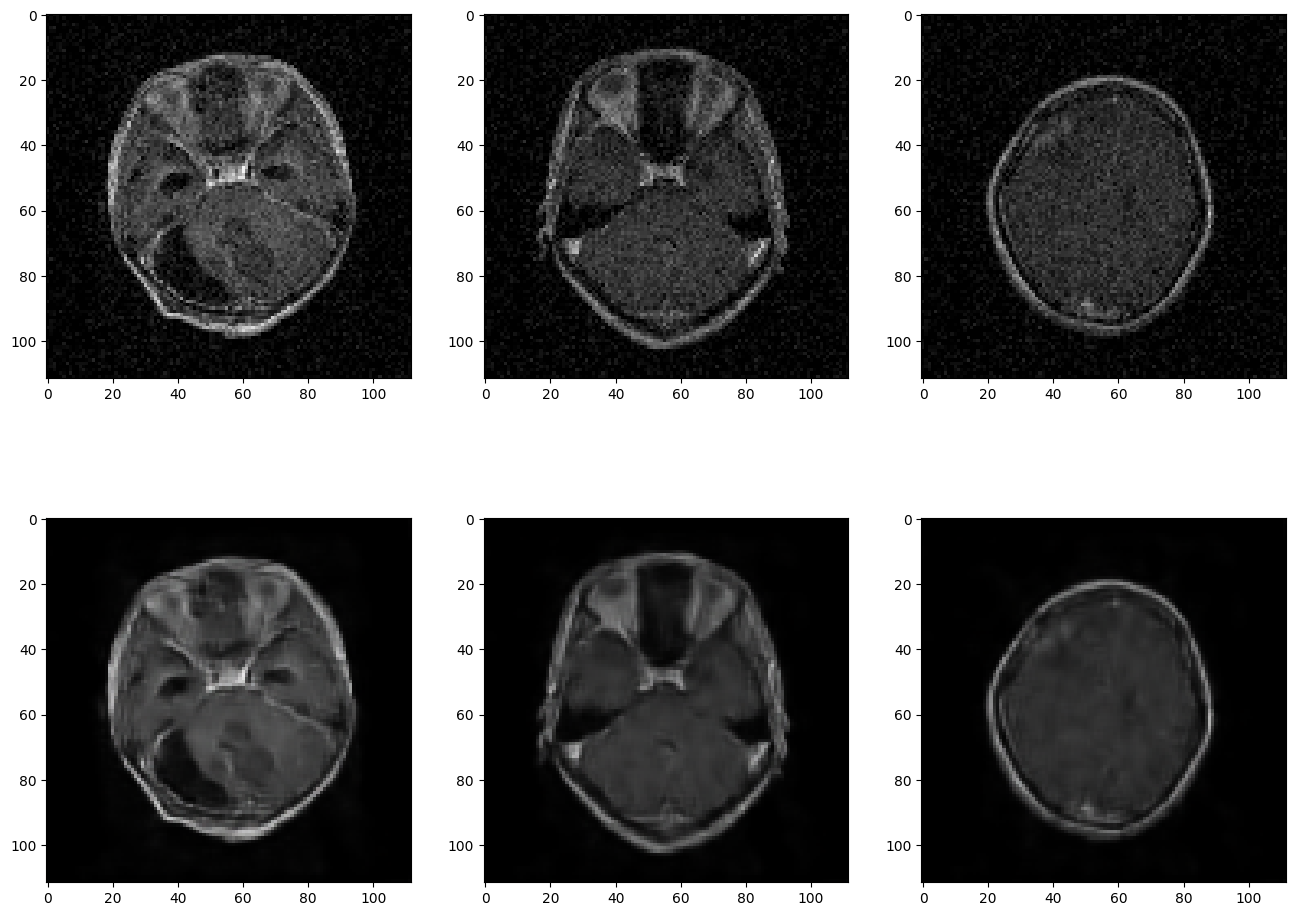

In [27]:
fig,ax = plt.subplots(2,3,figsize=(16,12))
ax[0][0].imshow(X[0])
ax[0][1].imshow(X[1])
ax[0][2].imshow(X[2])
ax[1][0].imshow(denoiser_outputs[0])
ax[1][1].imshow(denoiser_outputs[1])
ax[1][2].imshow(denoiser_outputs[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


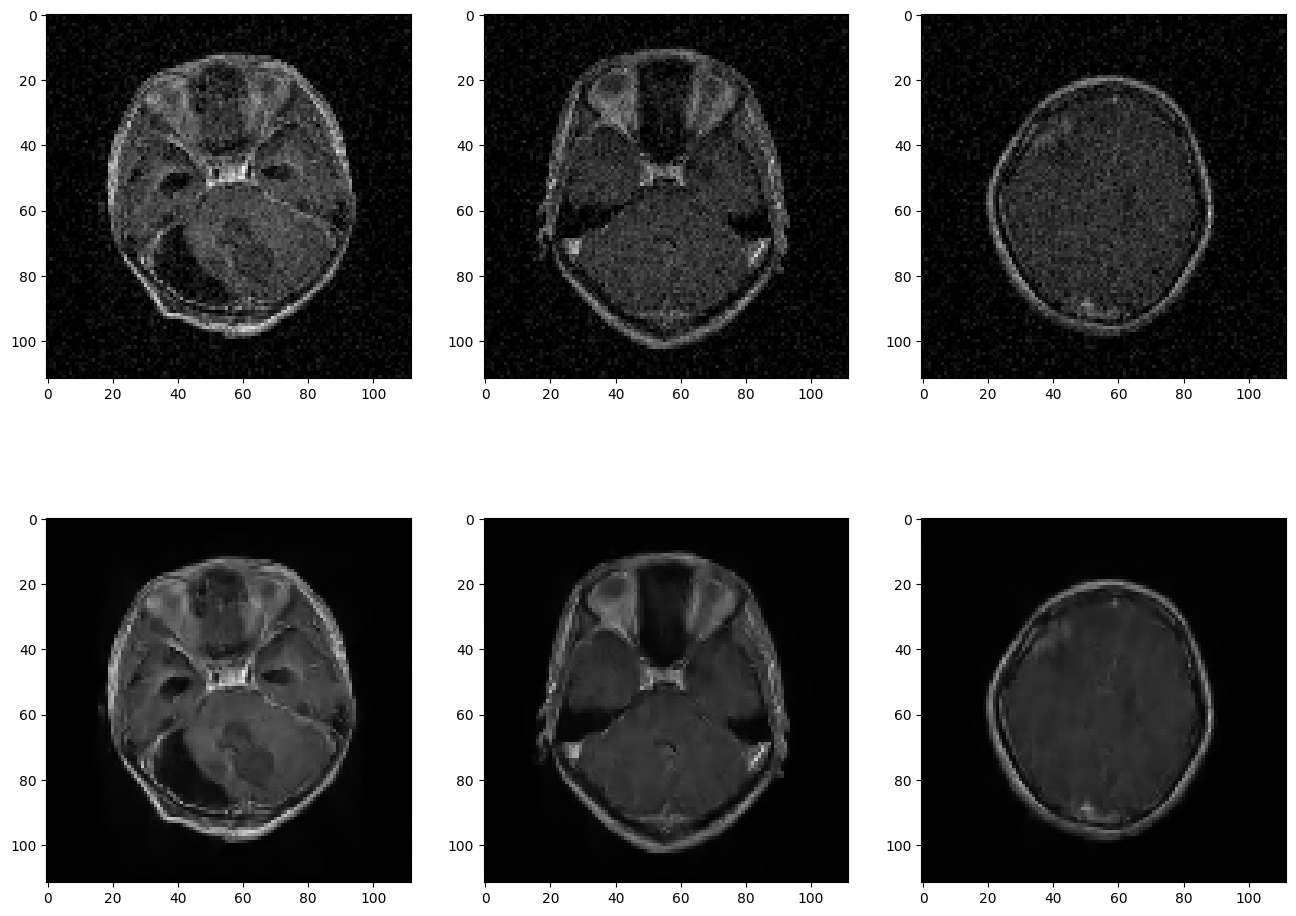

In [28]:
fig,ax = plt.subplots(2,3,figsize=(16,12))
ax[0][0].imshow(X[0])
ax[0][1].imshow(X[1])
ax[0][2].imshow(X[2])
ax[1][0].imshow(denoise_enhance_outputs[0])
ax[1][1].imshow(denoise_enhance_outputs[1])
ax[1][2].imshow(denoise_enhance_outputs[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


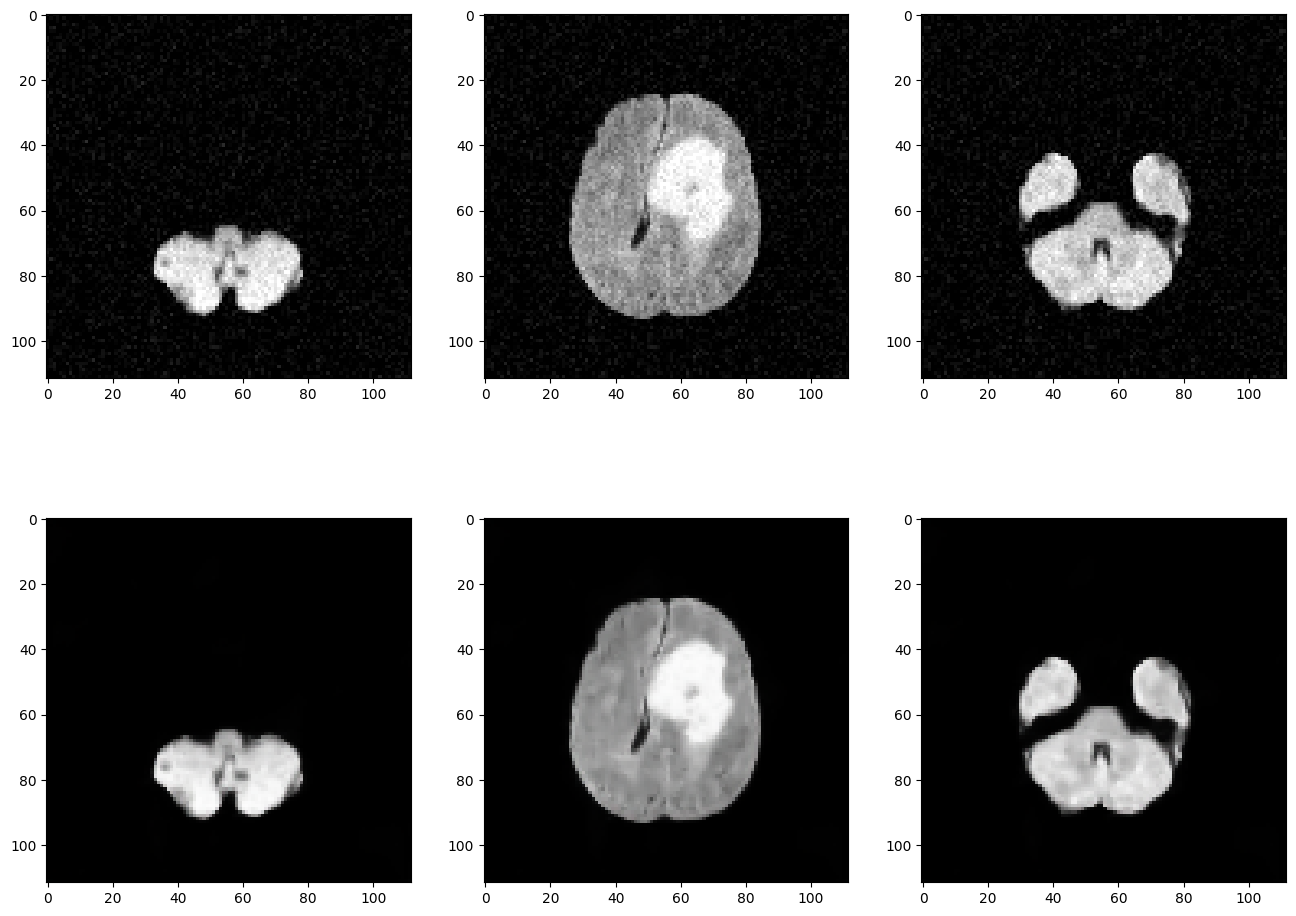

In [29]:
fig,ax = plt.subplots(2,3,figsize=(16,12))
ax[0][0].imshow(X2[0])
ax[0][1].imshow(X2[1])
ax[0][2].imshow(X2[2])
ax[1][0].imshow(denoise_enhance_outputs2[0])
ax[1][1].imshow(denoise_enhance_outputs2[1])
ax[1][2].imshow(denoise_enhance_outputs2[2])